<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="http://www.editorialuoc.cat/mineria-de-datos" target="_blank">Minería de datos: Modelos y algoritmos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# CH15EJ4 *Stacked*

En este ejemplo se muestra como generar un clasificador arbol de decisión y como mejorarlo con la técnica de *Stacking*.

## 1. Instalar los packages necesarios 

In [1]:
if(!require(rpart)){
    install.packages('rpart',repos='http://cran.es.r-project.org')
    require(rpart)
}
if(!require(caret)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
if(!require(randomForest)){
    install.packages('randomForest',repos='http://cran.es.r-project.org')
    require(ramdomForest)
}
if(!require(caretEnsemble)){
    install.packages('caretEnsemble',repos='http://cran.es.r-project.org')
    require(caretEnsemble)
}
if(!require(C50)){
    install.packages('C50',repos='http://cran.es.r-project.org')
    require(C50)
}
if(!require(plyr)){
    install.packages('plyr',repos='http://cran.es.r-project.org')
    require(plyr)
}
if(!require(kernlab)){
    install.packages('kernlab',repos='http://cran.es.r-project.org')
    require(kernlab)
}
if(!require(nnet)){
    install.packages('nnet',repos='http://cran.es.r-project.org')
    require(nnet)
}
set.seed(17)

Loading required package: rpart

Warning message:
“package ‘rpart’ was built under R version 3.5.2”
Loading required package: caret

Warning message:
“package ‘caret’ was built under R version 3.5.2”
Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 3.5.2”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”
Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: caretEnsemble

Warning message:
“package ‘caretEnsemble’ was built under R version 3.5.2”

Attaching package: ‘caretEnsemble’


The following object is masked from ‘package:ggplot2’:

    autoplot


Loading required package: C50

Loading required package: plyr

Warning message:
“package ‘plyr’ was built under R version 3.5.2”
Loading required 

## 2. Carga de los datos

In [3]:
wdbc=read.table(url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"), 
                  sep=",", header=FALSE)

dim(wdbc)
dataset <- wdbc[,(2:32)]

[1] 569  32

## 3. Creación del modelo

### Parámetros de nivel 0

In [4]:
# Metrica de calidad % instancias correctas sobre total
metric <- "Accuracy"

# Val. cruzada 
control <- trainControl(method="repeatedcv", number=10, repeats=3,savePredictions="all",classProbs=TRUE)

#algoritmos N0
algorithmList <- c('nnet', 'rpart', 'C5.0', 'knn', 'svmRadial')

### Creamos nivel 0

In [5]:
models <- caretList(V2~., data=dataset, trControl=control, metric=metric, methodList=algorithmList)

Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  33
initial  value 357.697663 
final  value 338.205383 
converged
# weights:  97
initial  value 359.324078 
final  value 338.205383 
converged
# weights:  161
initial  value 354.226379 
iter  10 value 336.232656
iter  20 value 336.226690
iter  20 value 336.226687
iter  20 value 336.226687
final  value 336.226687 
converged
# weights:  33
initial  value 496.244406 
iter  10 value 338.231892
final  value 338.218999 
converged
# weights:  97
initial  value 344.568397 
iter  10 value 339.285052
iter  20 value 338.222954
iter  30 value 338.215062
iter  40 value 338.214638
iter  50 value 338.213314
iter  60 value 338.213094
final  value 338.212515 
converged
# weights:  161
initial  value 340.025837 
iter  10 value 232.871866
iter  20 value 143.760815
iter  30 value 125.726998
iter  40 value 117.460968
iter  50 value 112.225839
iter  60 value 111.675639
iter  70 value 108.733853
iter  80 value 97.309530
iter  90 value 91.808371
iter 100 value 84.867653
final  value 84.867653 
stop

initial  value 371.304466 
final  value 338.675483 
converged
# weights:  97
initial  value 400.181964 
final  value 338.673358 
converged
# weights:  161
initial  value 390.294333 
final  value 338.674440 
converged
# weights:  33
initial  value 503.242801 
final  value 338.205383 
converged
# weights:  97
initial  value 496.685481 
final  value 338.205383 
converged
# weights:  161
initial  value 342.258474 
final  value 338.205383 
converged
# weights:  33
initial  value 397.124199 
iter  10 value 338.224152
final  value 338.218999 
converged
# weights:  97
initial  value 421.345714 
iter  10 value 337.984713
iter  20 value 302.985653
iter  30 value 183.627930
iter  40 value 149.158866
iter  50 value 135.061776
iter  60 value 94.360247
iter  70 value 62.681482
iter  80 value 50.813194
iter  90 value 50.122737
final  value 50.122713 
converged
# weights:  161
initial  value 359.545710 
iter  10 value 276.989039
iter  20 value 147.673273
iter  30 value 133.073485
iter  40 value 104.48

initial  value 363.427637 
final  value 338.205383 
converged
# weights:  161
initial  value 484.653152 
final  value 338.205383 
converged
# weights:  33
initial  value 362.273224 
iter  10 value 338.328595
iter  20 value 330.690854
iter  30 value 200.278848
iter  40 value 141.008945
iter  50 value 102.988229
iter  60 value 83.978314
iter  70 value 58.808696
iter  80 value 56.870697
iter  90 value 56.322552
final  value 56.322541 
converged
# weights:  97
initial  value 662.794146 
iter  10 value 336.295239
iter  20 value 188.655041
iter  30 value 147.377058
iter  40 value 135.939064
iter  50 value 120.935912
iter  60 value 89.034490
iter  70 value 69.924651
iter  80 value 60.484864
iter  90 value 54.850633
iter 100 value 48.960126
final  value 48.960126 
stopped after 100 iterations
# weights:  161
initial  value 357.817116 
iter  10 value 335.967171
iter  20 value 292.977809
iter  30 value 222.048345
iter  40 value 190.875843
iter  50 value 150.097431
iter  60 value 135.719406
iter 

initial  value 339.581943 
final  value 338.205383 
converged
# weights:  97
initial  value 390.225199 
final  value 338.205383 
converged
# weights:  161
initial  value 338.685472 
final  value 338.205383 
converged
# weights:  33
initial  value 348.334782 
iter  10 value 332.292953
iter  20 value 190.154297
iter  30 value 146.197547
iter  40 value 140.536956
iter  50 value 111.650958
iter  60 value 85.527739
iter  70 value 58.072220
iter  80 value 51.534153
final  value 51.532031 
converged
# weights:  97
initial  value 351.704806 
iter  10 value 337.989247
iter  20 value 316.958454
iter  30 value 310.807338
iter  40 value 304.796493
iter  50 value 171.108869
iter  60 value 152.906496
iter  70 value 116.660415
iter  80 value 101.626075
iter  90 value 100.810054
iter 100 value 97.217444
final  value 97.217444 
stopped after 100 iterations
# weights:  161
initial  value 417.964218 
iter  10 value 204.253717
iter  20 value 146.268050
iter  30 value 144.831223
iter  40 value 124.401954
i

initial  value 342.367980 
iter  10 value 151.042784
iter  20 value 147.630681
iter  30 value 147.615984
iter  40 value 145.404413
iter  50 value 143.393938
iter  60 value 142.838279
iter  70 value 134.431626
iter  80 value 103.973865
iter  90 value 100.271530
iter 100 value 99.178327
final  value 99.178327 
stopped after 100 iterations
# weights:  97
initial  value 472.806476 
iter  10 value 135.686504
iter  20 value 122.329560
iter  30 value 116.079261
iter  40 value 113.387074
iter  50 value 112.712411
iter  60 value 112.647848
iter  70 value 112.614074
iter  80 value 112.613368
final  value 112.613352 
converged
# weights:  161
initial  value 401.775283 
final  value 338.205383 
converged
# weights:  33
initial  value 366.893642 
iter  10 value 338.003558
iter  20 value 143.410804
iter  30 value 137.190733
iter  40 value 111.372886
iter  50 value 65.804129
iter  60 value 54.495834
iter  70 value 54.387983
final  value 54.387983 
converged
# weights:  97
initial  value 365.653473 
i

initial  value 425.777131 
final  value 337.682536 
converged
# weights:  97
initial  value 376.210385 
final  value 337.683560 
converged
# weights:  161
initial  value 346.237127 
iter  10 value 273.425278
iter  20 value 233.779596
iter  30 value 216.237209
iter  40 value 216.233154
iter  50 value 186.141010
iter  60 value 185.216326
iter  70 value 185.198124
iter  80 value 185.178907
iter  90 value 185.178179
iter 100 value 161.988728
final  value 161.988728 
stopped after 100 iterations
# weights:  33
initial  value 353.579307 
final  value 338.671686 
converged
# weights:  97
initial  value 343.008258 
final  value 338.671686 
converged
# weights:  161
initial  value 360.822890 
final  value 338.671686 
converged
# weights:  33
initial  value 390.706795 
iter  10 value 319.787420
iter  20 value 240.737870
iter  30 value 159.499795
iter  40 value 151.604860
iter  50 value 139.378654
iter  60 value 113.900836
iter  70 value 104.482712
iter  80 value 61.145667
iter  90 value 58.51378

initial  value 350.036224 
final  value 338.208133 
converged
# weights:  161
initial  value 413.843786 
iter  10 value 375.590244
iter  20 value 332.185254
iter  30 value 208.200983
iter  40 value 175.700176
iter  50 value 147.294997
iter  60 value 134.252168
iter  70 value 122.835600
iter  80 value 117.508209
iter  90 value 98.632715
iter 100 value 87.370055
final  value 87.370055 
stopped after 100 iterations


###  Mostramos todas sus características

$nnet
Neural Network 

569 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 512, 511, 512, 512, 513, 512, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa     
  1     0e+00  0.6742060  0.13275539
  1     1e-04  0.6357557  0.02400000
  1     1e-01  0.8108493  0.50503199
  3     0e+00  0.7126264  0.24124798
  3     1e-04  0.6461358  0.05232068
  3     1e-01  0.9233140  0.82197121
  5     0e+00  0.7134982  0.24411617
  5     1e-04  0.7356361  0.30538874
  5     1e-01  0.9396048  0.86829255

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 5 and decay = 0.1.

$rpart
CART 

569 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 512, 511, 512, 512, 513, 512, ... 
Resampling results across tuning para


Call:
summary.resamples(object = results.N0)

Models: nnet, rpart, C5.0, knn, svmRadial 
Number of resamples: 30 

Accuracy 
               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
nnet      0.8214286 0.9298246 0.9473684 0.9396048 0.9649123 0.9824561    0
rpart     0.8571429 0.9122807 0.9298246 0.9284296 0.9473684 1.0000000    0
C5.0      0.8928571 0.9473684 0.9649123 0.9636465 0.9824561 1.0000000    0
knn       0.8928571 0.9174877 0.9298246 0.9320114 0.9473684 0.9824561    0
svmRadial 0.9298246 0.9644424 0.9822995 0.9719061 0.9824561 1.0000000    0

Kappa 
               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
nnet      0.5789474 0.8492063 0.8885938 0.8682926 0.9246032 0.9626719    0
rpart     0.6831683 0.8142586 0.8500530 0.8463765 0.8874547 1.0000000    0
C5.0      0.7623762 0.8880157 0.9234432 0.9215785 0.9621791 1.0000000    0
knn       0.7623762 0.8246362 0.8498368 0.8531854 0.8857108 0.9619238    0
svmRadial 0.8492063 0.9230769 0.9619238 0

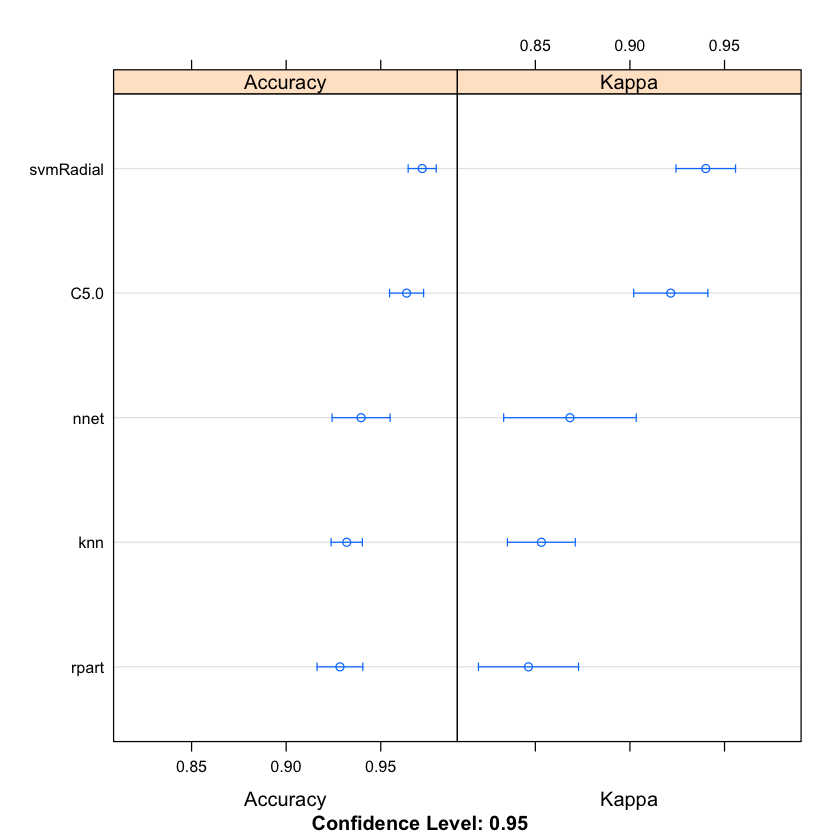

In [6]:
models
results.N0 <- resamples(models)
summary(results.N0)
dotplot(results.N0)

### Revisión de la correlacion entre los diferentes modelos

,nnet,rpart,C5.0,knn,svmRadial
nnet,1.00000000,0.3169719,0.2792219,0.01589183,-0.0130920
rpart,0.31697189,1.0000000,0.3708069,0.20747662,0.3180995
C5.0,0.27922192,0.3708069,1.0000000,0.23719576,0.5553513
knn,0.01589183,0.2074766,0.2371958,1.00000000,0.1313860
svmRadial,-0.01309200,0.3180995,0.5553513,0.13138599,1.0000000


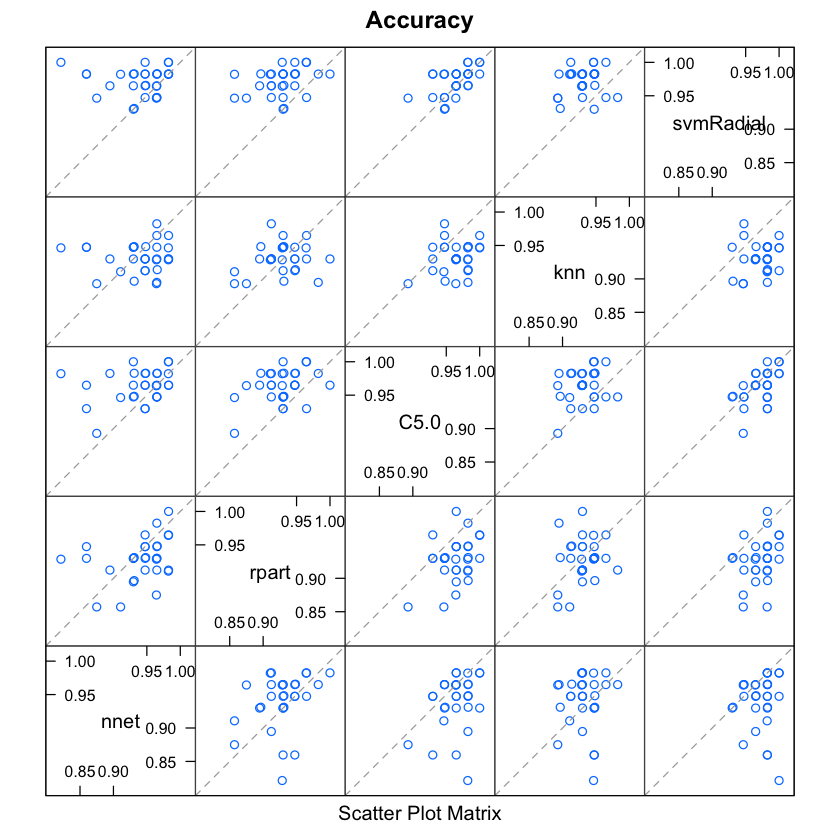

In [7]:
modelCor(results.N0)
splom(results.N0)

## 4. Construcción del modelo final

### Parámetros de construcción

In [8]:
stackControl <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions=TRUE, classProbs=TRUE)

### Creación del modelo

In [9]:
N1.rf <- caretStack(models, method="rf", metric="Accuracy", trControl=stackControl)

###  Mostramos sus características

In [10]:
print(N1.rf)

A rf ensemble of 5 base models: nnet, rpart, C5.0, knn, svmRadial

Ensemble results:
Random Forest 

1707 samples
   5 predictor
   2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 1535, 1537, 1536, 1537, 1537, 1537, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9851656  0.9681661
  3     0.9845785  0.9669263
  5     0.9851622  0.9681535

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.
